In [1]:
import dill
dill._dill._reverse_typemap['ClassType'] = type

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score, auc
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

Функция для отрисовки ROC_AUC curve

In [7]:
def roc_auc_curve_draw(y_test, y_pred):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds_ = roc_curve(y_test, y_pred, pos_label=1)# C = 0.1
    roc_auc = auc(fpr, tpr)
    lw = 2

    plt.plot(fpr, 
             tpr, 
             lw=lw, 
             label="ROC curve (area = %0.2f)" % roc_auc)    
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    #plt.savefig("ROC.png")
    plt.show()
    return roc_auc

### Получение прдсказаний

Импорт подготовленных файлов с данными.

In [8]:
X_test = pd.read_csv("X_test.csv", index_col=0, parse_dates = ['Date'])
y_test = pd.read_csv("y_test.csv", index_col=0)

In [9]:
X_test.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindGustDir_E,WindGustDir_S,WindDir9am_N,WindDir9am_W,WindDir9am_E,WindDir9am_S,WindDir3pm_N,WindDir3pm_W,WindDir3pm_E,WindDir3pm_S
62475,2012-08-16,Sale,276.15,288.65,0.2,2.4,9.400000,NW,52.0,NW,...,NaN,NaN,0.500,0.500,NaN,NaN,0.5,0.500,NaN,NaN
134476,2013-01-15,Launceston,285.65,295.25,0.0,10.8,9.946793,NW,44.0,NW,...,NaN,NaN,0.500,0.500,NaN,NaN,0.5,0.500,NaN,NaN
105840,2009-10-06,Woomera,283.95,295.55,0.0,7.2,9.100000,SSE,46.0,SE,...,0.333,0.667,NaN,NaN,0.5,0.5,NaN,NaN,NaN,1.000
13630,2013-07-11,Moree,280.65,294.25,0.0,1.8,10.100000,E,30.0,E,...,1.000,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
80972,2017-05-31,Watsonia,277.65,286.25,6.2,2.0,6.100000,SSW,37.0,WNW,...,NaN,0.667,0.333,0.667,NaN,NaN,NaN,0.333,NaN,0.667


In [10]:
y_test.head()

,RainTomorrow
62475,0
134476,0
105840,0
13630,0
80972,0


Загрузка обученной модели из предыдущего этапа.

In [11]:
with open("catboost_model.dill", 'rb') as in_strm:
    clf = dill.load(in_strm)

Получение предсказаний по загруженному датасету с использованием предварительно обученой модели.

In [12]:
y_pred_proba = clf.predict_proba(X_test)

### Метрики

Построим две стандартные метрики:
- кривую точность/полнота
- ROC_AUC кривую

In [13]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

In [14]:
fscore = (2 * precision * recall) / (precision + recall)
ix = np.argmax(fscore)

In [15]:
n=-1

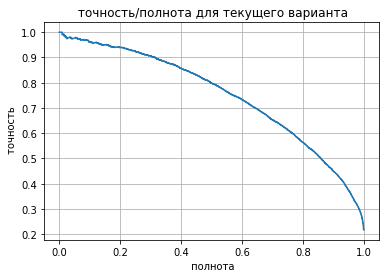

In [16]:
plt.plot(recall[:n],precision[:n] )
plt.title(' точность/полнота для текущего варианта')
plt.xlabel(' полнота')
plt.ylabel(' точность')
plt.grid('On')
plt.show()

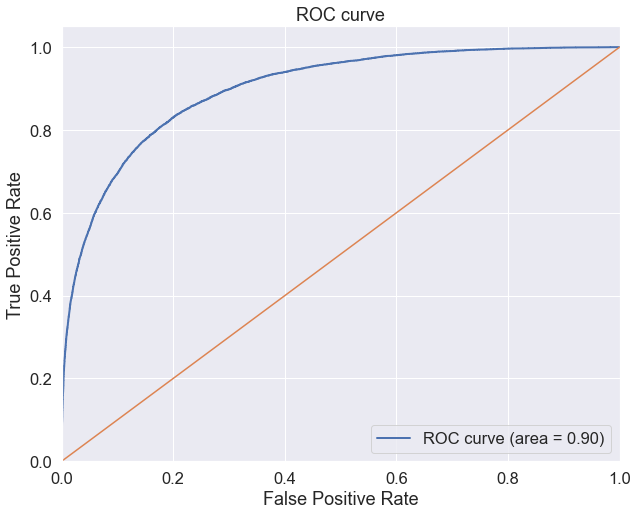

In [17]:
roc_auc = roc_auc_curve_draw(y_test, y_pred_proba[:, 1])

In [18]:
roc_auc_score(y_score=y_pred_proba[:, 1][:], y_true=y_test.iloc[:])

0.8990223919334965

В дальнейшем, после дополнительной работы с датасетом эта величина может измениться.